### Polynomial Regression

Polynomial Regression extends the idea of linear regression by allowing for non-linear relationships between the input features and the target variable. It achieves this by introducing polynomial terms of the existing features. These polynomial terms, such as $x^2$, $x^3$, etc., act as non-linear transformations of the original features, enabling the model to capture more complex patterns in the data that a simple linear regression can’t handle.

The goal of polynomial regression remains the same as linear regression—predicting the target value. However, with polynomial regression, we add higher-degree terms (e.g., $x^2$, $x^3$, and so on) to allow the model to better fit data that follows a **non-linear trend**.

For istance, below we apply polynomial regression to a dataset where the relationship between the features and the target is non-linear. Specifically, we transform the feature into its quadratic ($x^2$) and cubic ($x^3$) forms, adding these higher-degree features to the original feature. This helps us capture the more complex patterns in the data, which would not be possible with simple linear regression.

In [1]:
import numpy as np
import pandas as pd

from scratch_libraries.linear_regression import LinearRegression
from scratch_libraries.metrics import RegressionMetrics
from scratch_libraries.utilities import plot_theta_gd

In [2]:
# read the dataset of houses prices
salary = pd.read_csv('./datasets/Position_Salaries_base.csv')

display(salary)
# print(salary.columns)

,Level,Salary
0,1,45000
1,2,50000
2,3,60000
3,4,80000
4,5,110000
5,6,150000
6,7,200000
7,8,300000
8,9,500000
9,10,1000000


In [3]:
# shuffles the rows of the salary DataFrame randomly and resets the row indices afterward
salary = salary.sample(frac=1, random_state=123).reset_index(drop=True) # Note: sample method, with frac=1, selects 100% of the rows from salary, but in a random order, effectively shuffling the rows.

display(salary)

,Level,Salary
0,5,110000
1,1,45000
2,8,300000
3,6,150000
4,9,500000
5,4,80000
6,2,50000
7,7,200000
8,10,1000000
9,3,60000


In [4]:
salary = salary.values

train_index = round(len(salary) * 0.8)

x = salary[:, 0]
y = salary[:, 1]

x_train = x[:train_index]
y_train = y[:train_index]
x_test = x[train_index:]
y_test = y[train_index:]

In [5]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [6]:
# let's create new features, specifically we eant to add quadratic and cubic polynomial terms
x_train_squared = x_train ** 2
x_test_squared = x_test ** 2

x_train_cubic = x_train ** 3
x_test_cubic = x_test ** 3

In [7]:
x_train = np.column_stack((x_train, x_train_squared, x_train_cubic))
x_test = np.column_stack((x_test, x_test_squared, x_test_cubic))

In [8]:
# add bias column
x_train = np.c_[np.ones(x_train.shape[0]), x_train]
x_test = np.c_[np.ones(x_test.shape[0]), x_test]

In [9]:
linear = LinearRegression(learning_rate=0.01, n_steps=1000, n_features=x_train.shape[1])

cost_history, theta_history = linear.fit_fullbatch(x_train, y_train)
print(cost_history[-1])

82250650.92648232


In [10]:
reg_metrics = RegressionMetrics(linear)
preds = linear.predict(x_test)
print(reg_metrics.compute_performance(preds, y_test))

{'mae': 136099.25695252122, 'mape': 33.05692799535486, 'mpe': 8.319672643161603, 'mse': 30904754272.452568, 'rmse': 175797.48084785676, 'r2': 0.8600961780332613}


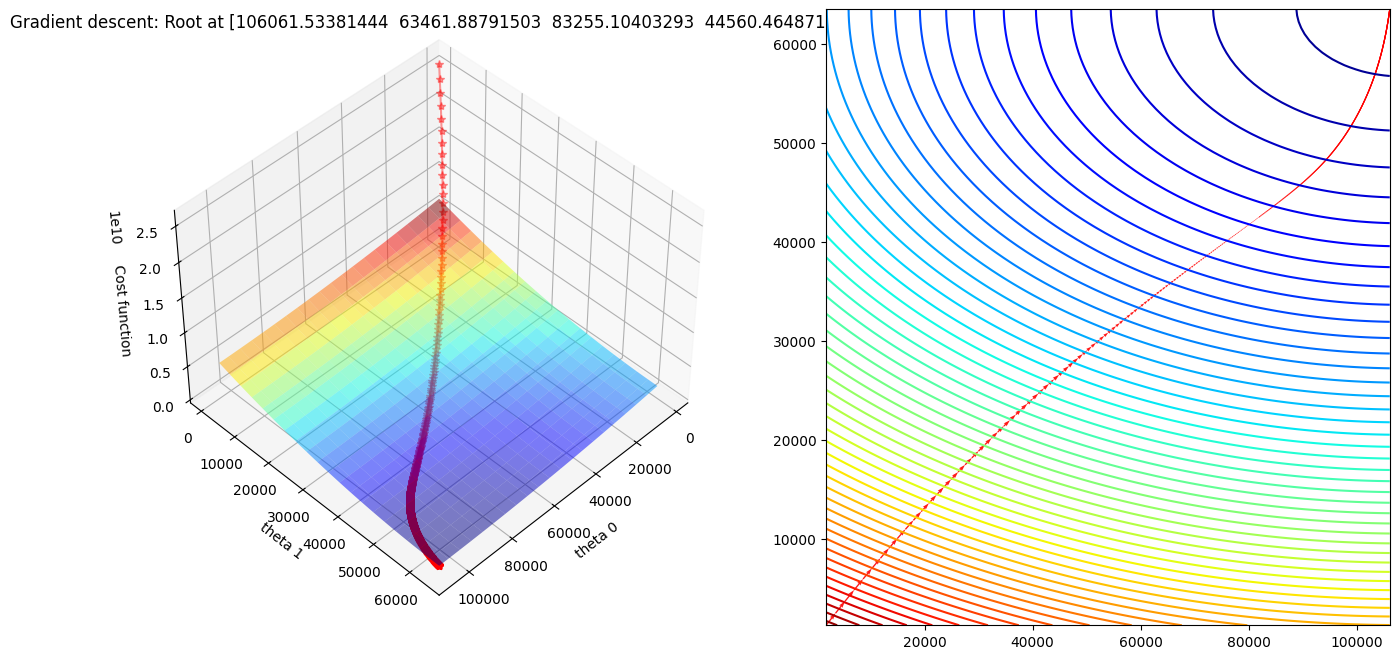

In [11]:
plot_theta_gd(x_train, y_train, linear, cost_history, theta_history, 0, 1)